<h1> DDOS - Anomaly Detection, Checking Packets/sec vs Size </h1>

In [2]:
# Import Libraries
import numpy as np # Matrix
import pandas as pd # Dataframes
import matplotlib.pyplot as plt # Graphing
import matplotlib.animation as animation # Graphing Animation

In [27]:
def loadDataset(filename):
    return np.array(pd.read_csv(filename, sep="\t", header=None))

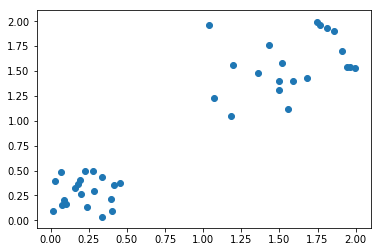

In [28]:
dataset = loadDataset('durudataset.txt')
plt.scatter(dataset[:,0],dataset[:,1])

In [78]:
# Eucledian or Frobenius Norm for between two points
def dist(a, b):
    return np.linalg.norm(a-b)

In [190]:
def k_means(filename, k, epsilon = 0, distance = 'eucledian', dataset = 0):
    if len(filename) > 0: 
        dataset = loadDataset(filename)
    num_of_datapoints, num_of_features = dataset.shape
    centeroids = dataset[np.random.randint(0,num_of_datapoints,k)]
    hist_centeroids = []
    
    point_belongs_to_cluster = np.zeros((num_of_datapoints,1))
    prev_centeroids = np.zeros(centeroids.shape)
    
    stop_cond = dist(centeroids, prev_centeroids)
#     print(stop_cond)
    # Plot intitial Cluster
#     plt.scatter(dataset[:,0],dataset[:,1])
#     plt.scatter(centeroids[:,0],centeroids[:,1])
#     plt.show()
    hist_centeroids.append(centeroids)
    
    while stop_cond > epsilon:
        
        prev_centeroids = centeroids
        
        for ind_data, datapt in enumerate(dataset):
            dist_cent_point = np.zeros((k,1))
            for ind_cent, cent in enumerate(centeroids):
#                 print(ind_cent, ': ', dist(cent, datapt))
                dist_cent_point[ind_cent] = dist(cent, datapt)
            
            point_belongs_to_cluster[ind_data] = np.argmin(dist_cent_point)
            
        new_cent = np.zeros((k,num_of_features))
        
        for cluster_num in range(k):
            cluster_of_pts = [i for i in range(num_of_datapoints) if point_belongs_to_cluster[i] == cluster_num ]
            new_centeroid = np.mean(dataset[cluster_of_pts], axis=0)
            new_cent[cluster_num,:] = new_centeroid
        
        centeroids = new_cent
        
        hist_centeroids.append(centeroids)
        
        stop_cond = dist(centeroids, prev_centeroids)
    
        
    return centeroids, hist_centeroids, point_belongs_to_cluster
    

In [191]:
#lets define a plotting algorithm for our dataset and our centroids
def plot(dataset, history_centroids, belongs_to):
    #we'll have 2 colors for each centroid cluster
    colors = ['r', 'g']

    #split our graph by its axis and actual plot
    fig, ax = plt.subplots()

    #for each point in our dataset
    for index in range(dataset.shape[0]):
        #get all the points assigned to a cluster
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        #assign each datapoint in that cluster a color and plot it
        for instance_index in instances_close:
            ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'o'))

    #lets also log the history of centroids calculated via training
    history_points = []
    #for each centroid ever calculated
    for index, centroids in enumerate(history_centroids):
        #print them all out
        for inner, item in enumerate(centroids):
            if index == 0:
                history_points.append(ax.plot(item[0], item[1], 'bo')[0])
            else:
                history_points[inner].set_data(item[0], item[1])
                print("centroids {} {}".format(index, item))

                plt.show()

In [192]:
%matplotlib notebook
def plot_step_by_step(dataset, history_centroids, belongs_to):
    colors = ['r', 'g']

    fig, ax = plt.subplots()

    for index in range(dataset.shape[0]):
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        for instance_index in instances_close:
            ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'o'))

    history_points = []
    for index, centroids in enumerate(history_centroids):
        for inner, item in enumerate(centroids):
            if index == 0:
                history_points.append(ax.plot(item[0], item[1], 'bo')[0])
            else:
                history_points[inner].set_data(item[0], item[1])
                print("centroids {} {}".format(index, item))
                
                plt.pause(0.8)

In [193]:
centeroids, hist_centeroids, point_belongs_to_cluster = k_means('durudataset.txt', k=2, epsilon = 0, distance = 'eucledian')

In [194]:
dataset = pd.read_csv('ex2data1.txt')
dataset = dataset.loc[:,['34.62365962451697', '78.0246928153624']]
dataset = np.array(dataset)

<IPython.core.display.Javascript object>


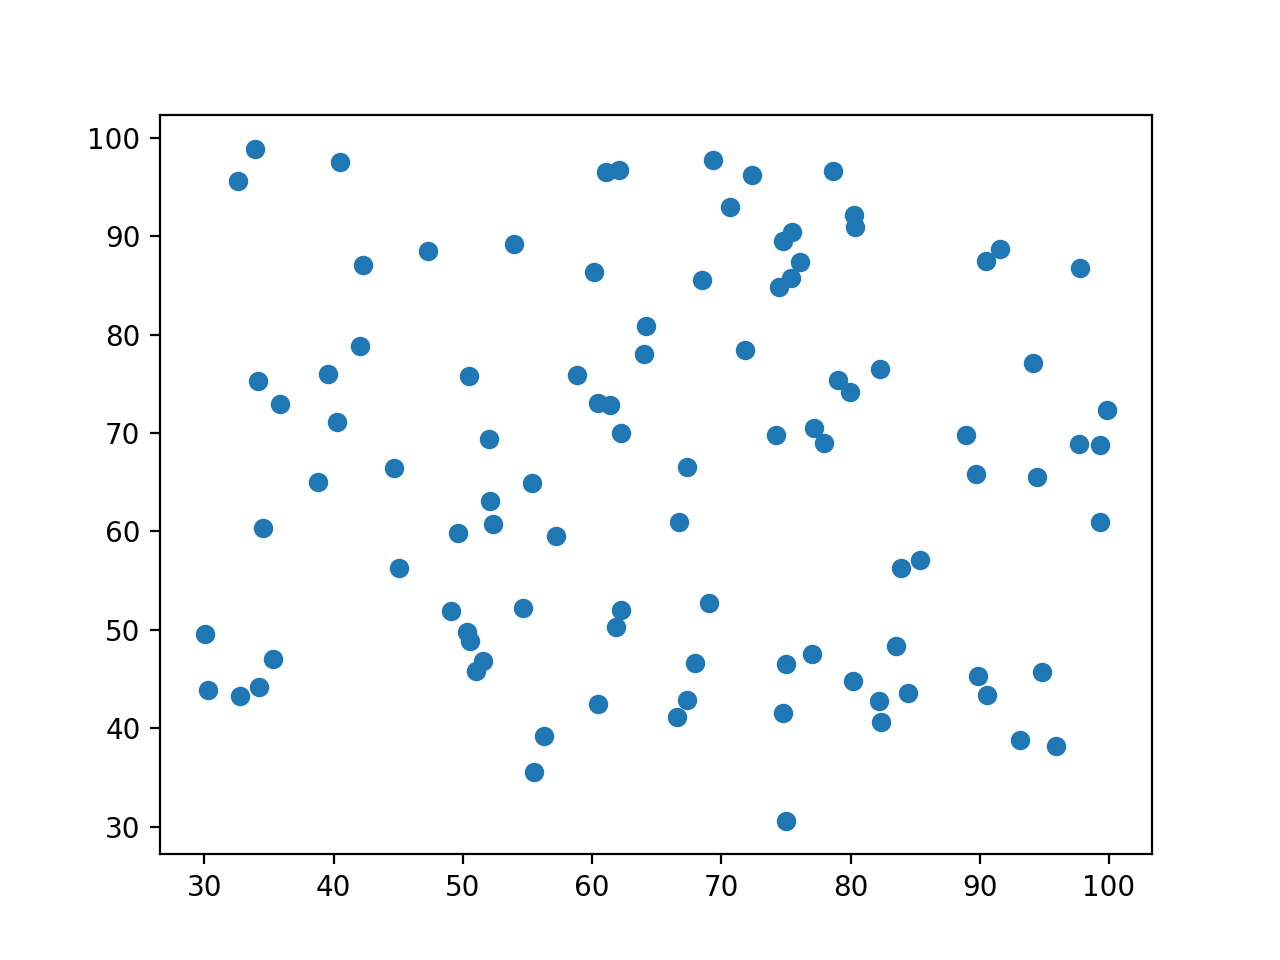

In [195]:
plt.scatter(dataset[:,0],dataset[:,1])
centeroids, hist_centeroids, point_belongs_to_cluster = k_means('', k=2, epsilon = 0, distance = 'eucledian', dataset= dataset)

<IPython.core.display.Javascript object>


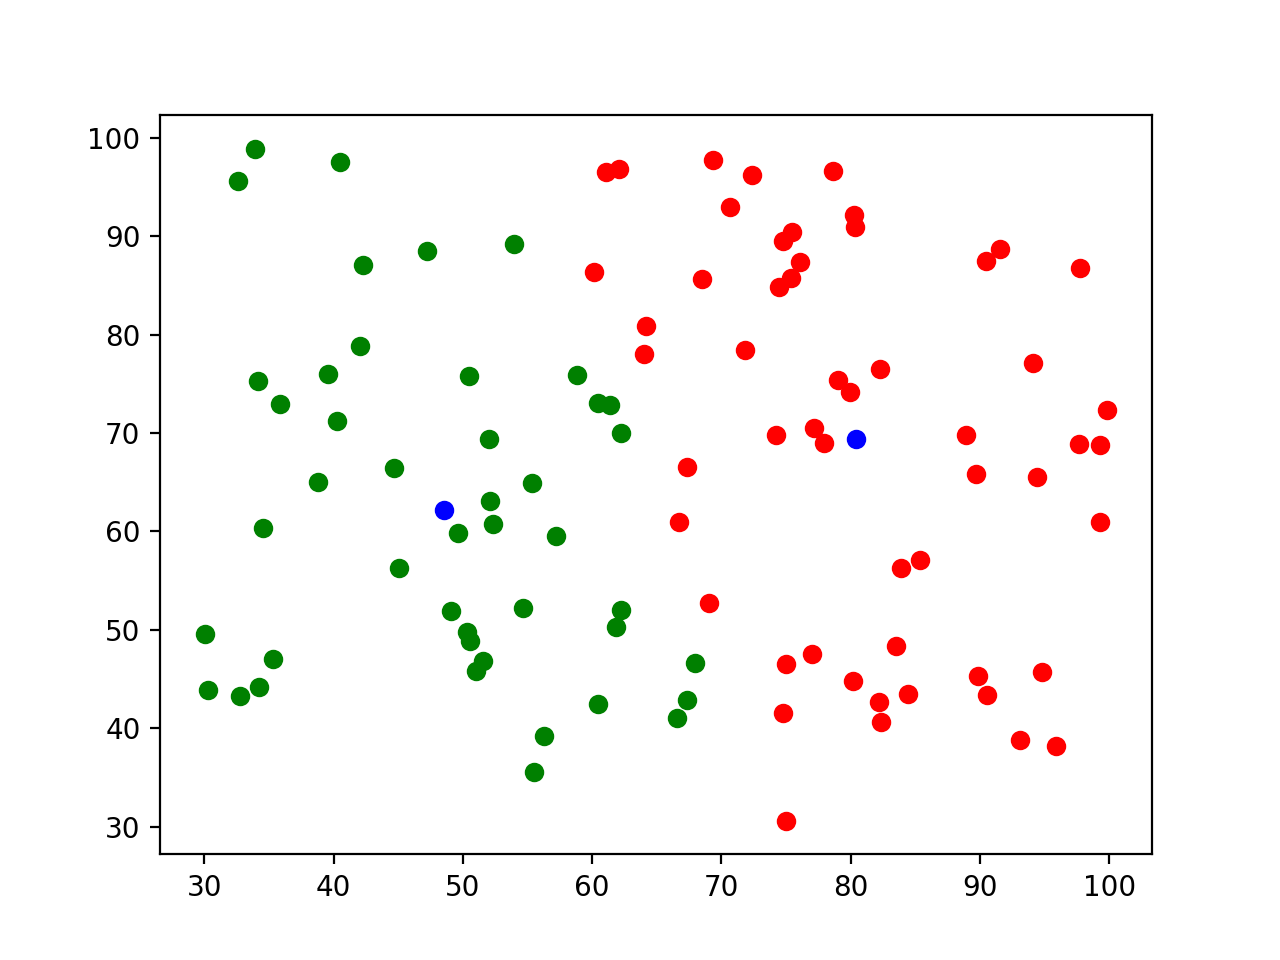

centroids 1 [78.01619096 67.2617439 ]
centroids 1 [44.85510322 64.07459028]
centroids 2 [79.15345265 68.12829421]
centroids 2 [46.49375099 63.11514394]
centroids 3 [79.68620215 68.52051532]
centroids 3 [47.32595771 62.82156531]
centroids 4 [80.22673602 68.96139049]
centroids 4 [48.12121056 62.52951453]
centroids 5 [80.45414122 69.37403523]
centroids 5 [48.56178045 62.17727141]
centroids 6 [80.45414122 69.37403523]
centroids 6 [48.56178045 62.17727141]


In [196]:
plot(dataset, hist_centeroids, point_belongs_to_cluster)

In [202]:
datasetAnswers = pd.read_csv('ex2data1.txt')
datasetAnswers = np.array(datasetAnswers.loc[:,['0']])

In [203]:
for ind, i in enumerate(datasetAnswers):
    if i == 0:
        datasetAnswers[ind] = 1
    else:
        datasetAnswers[ind] = 0

In [207]:
datasetAnswers == point_belongs_to_cluster) * 100

81.81818181818183